In this notbook, I tried the method motivated from http://omilab.naist.jp/~mukaigawa/papers/PR2014-GaitDB.pdf.

The raw sensor data's are devided using autocorelation, then they are averaged so that we have six smaller sequences.
To minimise computation, all men and women sequences are averaged respectively.
The distance between these two sequences and test subjects using Dynamic Time Warping(DTW), and smaller will be assigned to predicted class.

This baseline only done for AutomaticExtractionData_IMUZCenter_Walk_1.
The 4-fold CV accuracy is 0.489247311827957,0.46842105263157896,0.5604395604395604 and 0.4808743169398907

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold

In [0]:
def file_name(file_dir): 
    dic={}
    for root, dirs, files in os.walk(file_dir):
        dic[root]=files
    return dic

In [0]:
AutomaticExtractionData=file_name('AutomaticExtractionData_IMUZCenter')
ManualExtractionData=file_name('ManualExtractionData')
ManualExtractionData_name=list(ManualExtractionData.keys())[1:]
label=pd.read_csv('IDGenderAgelist_ig.csv',dtype='object')

In [0]:
def change_ID_number(x):
    if len(x)==3:
        return ('000' + x)
    elif len(x)==4:
        return ('00' + x)
    elif len(x)==5:
        return ('0' + x)
    else:
        return x
      
label['adjusted_ID']=label['ID'].apply(lambda x: change_ID_number(x))
def file_name_with_ID(x,post,ls):
    for i in range(len(list(ls))):
        if (x == ls[i][5:11] and ls[i][12:]== post):
            return(ls[i])

In [0]:
label['AutomaticExtractionData_IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq0.csv',list(AutomaticExtractionData.values())[0]))
label['AutomaticExtractionData_IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq1.csv',list(AutomaticExtractionData.values())[0]))
label['ManualExtractionData/IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZRight_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZLeft_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/Android_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[3]]))

In [0]:
label.head()

,ID,Gender(0:Female;1:Male),Age,adjusted_ID,AutomaticExtractionData_IMUZCenter_Walk_1,AutomaticExtractionData_IMUZCenter_Walk_2,ManualExtractionData/IMUZCenter_Walk_1,ManualExtractionData/IMUZCenter_Walk_2,ManualExtractionData/IMUZCenter_SlopeDown,ManualExtractionData/IMUZCenter_SlopeUp,...,ManualExtractionData/IMUZRight_SlopeDown,ManualExtractionData/IMUZRight_SlopeUp,ManualExtractionData/IMUZLeft_Walk_1,ManualExtractionData/IMUZLeft_Walk_2,ManualExtractionData/IMUZLeft_SlopeDown,ManualExtractionData/IMUZLeft_SlopeUp,ManualExtractionData/Android_Walk_1,ManualExtractionData/Android_Walk_2,ManualExtractionData/Android_SlopeDown,ManualExtractionData/Android_SlopeUp
0,000104,1,33,000104,T0_ID000104_Center_seq0.csv,T0_ID000104_Center_seq1.csv,T0_ID000104_Walk1.csv,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,...,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,T0_ID000104_Walk1.csv,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,T0_ID000104_Walk1.csv,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv
1,002318,0,11,002318,T0_ID002318_Center_seq0.csv,T0_ID002318_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,002422,1,9,002422,T0_ID002422_Center_seq0.csv,T0_ID002422_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,002526,0,45,002526,T0_ID002526_Center_seq0.csv,T0_ID002526_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,002630,0,37,002630,T0_ID002630_Center_seq0.csv,T0_ID002630_Center_seq1.csv,T0_ID002630_Walk1.csv,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,...,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,T0_ID002630_Walk1.csv,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,T0_ID002630_Walk1.csv,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv
5,002734,1,47,002734,T0_ID002734_Center_seq0.csv,T0_ID002734_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,002838,1,2,002838,T0_ID002838_Center_seq0.csv,T0_ID002838_Center_seq1.csv,T0_ID002838_Walk1.csv,T0_ID002838_Walk2.csv,T0_ID002838_SlopeDown.csv,T0_ID002838_SlopeUp.csv,...,T0_ID002838_SlopeDown.csv,T0_ID002838_SlopeUp.csv,T0_ID002838_Walk1.csv,T0_ID002838_Walk2.csv,T0_ID002838_SlopeDown.csv,T0_ID002838_SlopeUp.csv,T0_ID002838_Walk1.csv,T0_ID002838_Walk2.csv,T0_ID002838_SlopeDown.csv,T0_ID002838_SlopeUp.csv
7,002942,1,35,002942,T0_ID002942_Center_seq0.csv,T0_ID002942_Center_seq1.csv,T0_ID002942_Walk1.csv,T0_ID002942_Walk2.csv,T0_ID002942_SlopeDown.csv,T0_ID002942_SlopeUp.csv,...,None,None,T0_ID002942_Walk1.csv,T0_ID002942_Walk2.csv,T0_ID002942_SlopeDown.csv,T0_ID002942_SlopeUp.csv,T0_ID002942_Walk1.csv,T0_ID002942_Walk2.csv,T0_ID002942_SlopeDown.csv,T0_ID002942_SlopeUp.csv
8,004636,0,26,004636,T0_ID004636_Center_seq0.csv,T0_ID004636_Center_seq1.csv,T0_ID004636_Walk1.csv,T0_ID004636_Walk2.csv,T0_ID004636_SlopeDown.csv,T0_ID004636_SlopeUp.csv,...,None,None,T0_ID004636_Walk1.csv,T0_ID004636_Walk2.csv,T0_ID004636_SlopeDown.csv,T0_ID004636_SlopeUp.csv,T0_ID004636_Walk1.csv,T0_ID004636_Walk2.csv,T0_ID004636_SlopeDown.csv,T0_ID004636_SlopeUp.csv
9,004948,1,24,004948,T0_ID004948_Center_seq0.csv,T0_ID004948_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [0]:
def get_data(file_name,action_name,ID,label):
  dataset_name= file_name + action_name
  path_name= file_name +'/'+label[label['ID']==ID][dataset_name].values[0]
  df=pd.read_csv(path_name,skiprows=2)
  insert_line=pd.DataFrame(df.columns.values).T
  df.columns=insert_line.columns
  df=pd.concat([insert_line,df],axis=0)
  df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
  df = df.astype(float)
  return df
df = get_data('AutomaticExtractionData_IMUZCenter','_Walk_1','002318',label)

In [0]:
df.head()

,Gx,Gy,Gz,Ax,Ay,Az
0,0.236353,-0.627744,0.041949,-0.024,-0.826,0.150
0,0.177763,-0.622424,-0.053925,0.006,-0.834,0.148
1,0.044605,-0.638404,-0.181756,0.028,-0.824,0.148
2,-0.045942,-0.670364,-0.309588,0.040,-0.822,0.084
3,-0.056595,-0.643724,-0.384157,0.060,-0.844,0.026


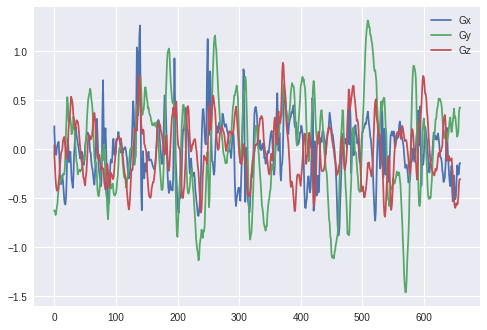

In [0]:
df[["Gx","Gy","Gz"]].plot()

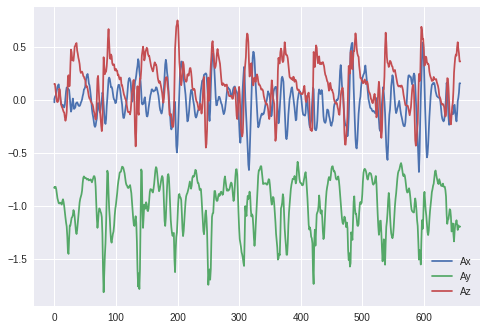

In [0]:
df[["Ax","Ay","Az"]].plot()

In [0]:
# Here the sequences are devided using auto correlation. Range are  
# will be between the starting point and the point which has highest auto correlation


geo = ["Gx","Gy","Gz"]
max_autocorr = 0
max_index = 0

for i in range(0,3):
  for j in range(10,150): 
    temp = df[geo[i]].autocorr(j)
    if(abs(temp) > max_autocorr):
      max_autocorr = temp
      max_index = j

In [0]:
ls = []
for i in range(1,int(np.floor(len(df) / max_index)) + 1):
  ls.append(df[geo[1]].iloc[max_index * (i- 1): max_index * i].values)

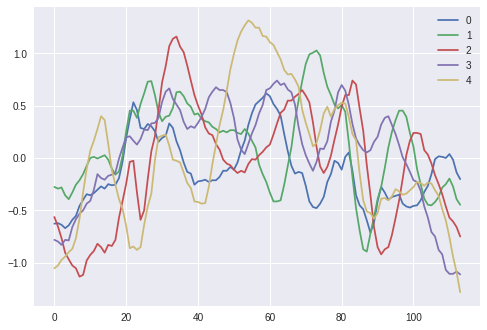

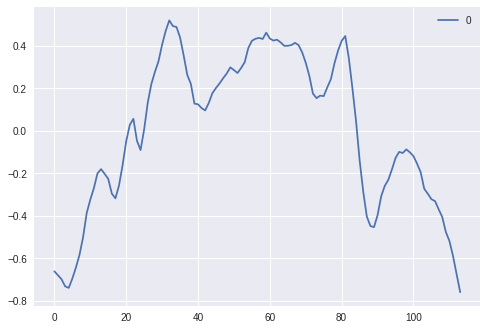

In [0]:
pd.DataFrame(ls).T.plot()
pd.DataFrame(np.mean(ls,axis = 0)).plot()

In [0]:
def get_feature_mean(df):
  geo = ['Gx','Gy','Gz','Ax','Ay','Az']
  ls = []
  
  for i in range(0,6):
    max_autocorr = 0
    max_index = 0
    for j in range(30,150): 
      temp = df[geo[i]].autocorr(j)
      if(abs(temp) > max_autocorr):
        max_autocorr = temp
        max_index = j
        
    temp = []
    for j in range(1,int(np.floor(len(df) / max_index)) + 1):
      temp.append(df[geo[i]].iloc[max_index * (j- 1): max_index * j].values)
    ls.append(np.mean(temp,axis = 0))
    
  return ls

In [0]:
feature = get_feature_mean(df)

KeyError: ignored

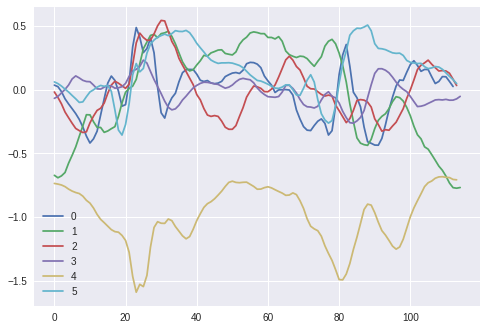

In [0]:
for i in range(0,len(feature)):
  plt.plot(feature[i],label = str(i))
plt.legend()

In [0]:
#The function to calculate DTW
δ = lambda a,b: (a - b)**2
first = lambda x: x[0]
second = lambda x: x[1]

def minVal(v1, v2, v3):
    if first(v1) <= min(first(v2), first(v3)):
        return v1, 0
    elif first(v2) <= first(v3):
        return v2, 1
    else:
        return v3, 2 

def calc_dtw(A, B):
    S = len(A)
    T = len(B)

    m = [[0 for j in range(T)] for i in range(S)]
    m[0][0] = (δ(A[0],B[0]), (-1,-1))
    for i in range(1,S):
        m[i][0] = (m[i-1][0][0] + δ(A[i], B[0]), (i-1,0))
    for j in range(1,T):
        m[0][j] = (m[0][j-1][0] + δ(A[0], B[j]), (0,j-1))

    for i in range(1,S):
        for j in range(1,T):
            minimum, index = minVal(m[i-1][j], m[i][j-1], m[i-1][j-1])
            indexes = [(i-1,j), (i,j-1), (i-1,j-1)]
            m[i][j] = (first(minimum)+δ(A[i], B[j]), indexes[index])
    return m

In [0]:
T = 150
S = 200
t = .4

A = np.sin(np.array(range(T))/10)
D = np.sin((np.array(range(S))/10 + t*np.pi))

calc_dtw(A, D)[-1][-1][0]

27.10001607534511

In [0]:
df = pd.read_csv('IDGenderAgelist_ig.csv')

In [0]:
df.head()

,ID,Gender(0:Female;1:Male),Age
0,104,1,33
1,2318,0,11
2,2422,1,9
3,2526,0,45
4,2630,0,37


In [0]:
ids = df["ID"].values
y = df["Gender(0:Female;1:Male)"].values

In [0]:
#To calculate the mean of value of sequcences, we find the shortest sequence 
# and shrink other sequences to that length using window averaging.
def calc_min(x_train,x_test):
  ls_min_len = []
  for i in range(0,6):
    min_len = 1000
    for j in range(0,len(x_train)):
      if(min_len > len(x_train[j][i])):
        min_len = len(x_train[j][i])
        index = j
    for j in range(0,len(x_test)):
      if(min_len > len(x_test[j][i])):
        min_len = len(x_test[j][i])
        index = j
    ls_min_len.append(min_len)
  return ls_min_len

def shrink_ts(feature,min_len):
  new_feature = []
  for i in range(0,6):
    temp = []
    s = int(np.floor(len(feature[i]) / min_len[i]))
    for j in range(0,min_len[i]):
      temp.append(np.mean(feature[i][s * j : s * (j+1)]))
    new_feature.append(np.array(temp))
  return np.array(new_feature)

In [1]:
##Stratified K-fold
from tqdm import tqdm

skf = StratifiedKFold(n_splits = 4)
ls_acc = []

for train_index, test_index in skf.split(ids, y):
  print("TRAIN:", len(train_index), "TEST:", len(test_index))
  ids_train, ids_test = ids[train_index], ids[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  x_train = []
  temp = []
  for i in tqdm(range(0,len(ids_train))):
    subject_id = change_ID_number(str(ids_train[i]))
    try:
      df_subject = get_data('AutomaticExtractionData_IMUZCenter','_Walk_1',subject_id,label)
      x_train.append(get_feature_mean(df_subject))
      temp.append(y_train[i])
    except:
      print("No data for subject id {}".format(subject_id))
  y_train = temp
    
  x_test = []
  temp = []
  for i in tqdm(range(0,len(ids_test))):
    subject_id = change_ID_number(str(ids_test[i]))
    try:
      df_subject = get_data('AutomaticExtractionData_IMUZCenter','_Walk_1',subject_id,label)
      x_test.append(get_feature_mean(df_subject))
      temp.append(y_test[i])
    except:
      print("No data for subject id {}".format(subject_id))
  y_test = temp

  ls_min_len = calc_min(x_train,x_test)
  new_x_train = []
  for i in range(len(x_train)):
    new_x_train.append(shrink_ts(x_train[i],ls_min_len))

  new_x_test = []
  for i in range(len(x_test)):
    new_x_test.append(shrink_ts(x_test[i],ls_min_len))
    
  new_x_test = np.array(new_x_test)
  new_x_train = np.array(new_x_train)
  y_train = np.array(y_train)
  y_test = np.array(y_test)
  
  mean_female = np.mean(new_x_train[y_train == 0],axis = 0)
  mean_male = np.mean(new_x_train[y_train == 1],axis = 0)
    
  y_pred = []
  for i in tqdm(range(len(x_test))):
    best = 1000000000000000
    index = -1
    score_male = 0
    score_female = 0
    for k in range(0,6):
      score_male += calc_dtw(x_test[i][k],mean_male[k])[-1][-1][0]
      score_female += calc_dtw(x_test[i][k],mean_female[k])[-1][-1][0]
    if(score_male > score_female):
      y_pred.append(0)
    else:
      y_pred.append(1)
      
  ls_acc.append(accuracy_score(y_pred,y_test))

NameError: name 'StratifiedKFold' is not defined

In [0]:
ls_acc

[0.489247311827957,
 0.46842105263157896,
 0.5604395604395604,
 0.4808743169398907]

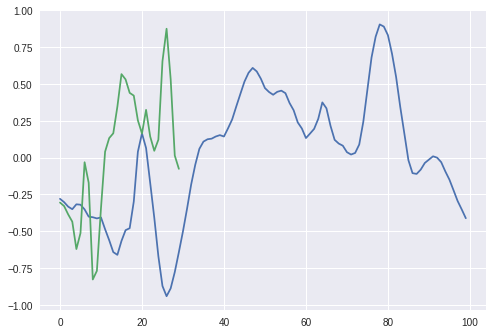

In [0]:
#The plot shows how raw and shrinked sequences are different.
plt.plot(x_train[0][1])
plt.plot(shrink_ts(x_train[0],ls_min_len)[1])

In [0]:
mean_female = np.mean(new_x_train[y_train == 0],axis = 0)
mean_male = np.mean(new_x_train[y_train == 1],axis = 0)

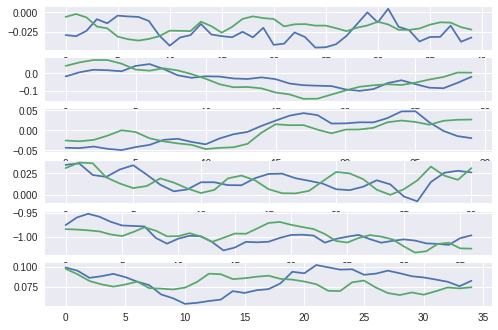

In [0]:
#Plot here shows how man and female sequences are different.
for i in range(1,7):
  plt.subplot(6,1,i)
  plt.plot(mean_female[i - 1])
  plt.plot(mean_male[i - 1])